In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import numpy as np
%matplotlib inline

In [3]:
games=pd.read_csv("gamesdataset.csv", encoding="latin1")

In [4]:
games["averageplayers"]=(games["maxplayers"]-games["minplayers"])/2

In [5]:
train=games[["playingtime", "weight", "median", "numcomments", "owned", "trading", "usersrated", "wanting", "average", "geekscore"]]
print(len(train))
train=train.dropna()
print(len(train))
X=train[["weight", "median", "owned", "trading", "wanting", "geekscore"]]
y=train["average"]

23932
23930


0        2.0
1        2.5
2        2.0
3        2.5
4        0.0
5        1.5
6        2.0
7        1.0
8        1.0
9        1.5
10       0.0
11       0.5
12       0.0
13       0.0
14       2.0
15       1.0
16       1.0
17       1.0
18       3.0
19       0.0
20       0.5
21       0.0
22       0.0
23       1.0
24       1.5
25       2.0
26       3.5
27       2.5
28       1.5
29       2.0
        ... 
23902    0.0
23903    0.0
23904    1.0
23905    9.0
23906    2.0
23907    2.0
23908    1.5
23909    1.0
23910    0.0
23911    0.0
23912    0.0
23913    0.5
23914    0.0
23915    1.0
23916    0.0
23917    1.5
23918    1.5
23919    0.0
23920    1.0
23921    2.0
23922    1.0
23923    0.0
23924    1.0
23925    1.0
23926    1.0
23927    0.5
23928    1.0
23929    2.0
23930    1.0
23931    3.0
Name: averageplayers, Length: 23932, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.33, random_state = 5)

In [7]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train, Y_train)
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((lm.predict(X_test) - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X_test, Y_test))

Coefficients: 
 [  3.37746941e-01  -1.38593564e-15   4.04341656e-05  -3.34926031e-03
   4.65113542e-03   2.28701638e-02]
Mean squared error: 0.99
Variance score: 0.16


In [8]:
import statsmodels.api as sm
from statsmodels.api import OLS
m = sm.OLS(y, X).fit()
m.summary()

C:\Users\test\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                average   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 1.577e+04
Date:                Sun, 30 Jul 2017   Prob (F-statistic):               0.00
Time:                        20:21:14   Log-Likelihood:                -59675.
No. Observations:               23930   AIC:                         1.194e+05
Df Residuals:                   23925   BIC:                         1.194e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weight         2.4467      0.014    175.049      0.000       2.419       2.474
median      -2.41e-14   1.39e-16   -172.932      0.000   -2.44e-14   -2.38e-14
owned          0.0003    3.9e-05      7.150      0.000       0.000       0.000
trading       -0.0052      0.001     -5.762      0.000      -0.007      -0.003
wanting       -0.0035      0.001     -6.213      0.000      -0.005      -0.002
geekscore      0.2595      0.008     34.405      0.000       0.245       0.274
==============================================================================
Omnibus:                      313.277   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.843
Skew:                           0.280   Prob(JB):                     1.75e-71
Kurtosis:                       3.116   Cond. No.                     2.79e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.93e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
m = sm.OLS(Y_train, X_train).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                average   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 1.052e+04
Date:                Sun, 30 Jul 2017   Prob (F-statistic):               0.00
Time:                        20:21:14   Log-Likelihood:                -39995.
No. Observations:               16033   AIC:                         8.000e+04
Df Residuals:                   16028   BIC:                         8.004e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weight         2.4435      0.017    142.686      0.000       2.410       2.477
median      8.203e-14   5.76e-16    142.349      0.000    8.09e-14    8.32e-14
owned          0.0003   4.55e-05      6.000      0.000       0.000       0.000
trading       -0.0052      0.001     -4.794      0.000      -0.007      -0.003
wanting       -0.0035      0.001     -4.838      0.000      -0.005      -0.002
geekscore      0.2629      0.009     28.437      0.000       0.245       0.281
==============================================================================
Omnibus:                      187.904   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.285
Skew:                           0.260   Prob(JB):                     3.93e-43
Kurtosis:                       3.150   Cond. No.                     1.53e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.82e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
from sklearn import preprocessing
X_scaled=preprocessing.scale(X)
y_scaled=preprocessing.scale(y)

Trying out a Logistic Regression Model

In [12]:
train=train.dropna()
ratings=[]
y=train.average.mean()
for i in train.average:
    if i> y:
        ratings.append("Good")
    if i == y or i <y:
        ratings.append("Bad")
train["ratings"]=ratings
train.columns

Index(['playingtime', 'weight', 'median', 'numcomments', 'owned', 'trading',
       'usersrated', 'wanting', 'average', 'geekscore', 'ratings'],
      dtype='object')

In [13]:
Xlr=train[[ "weight", "owned", "trading",  "wanting"]]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Xtrainlr, Xtestlr, ytrainlr, ytestlr = train_test_split(Xlr.values, 
                                              (train.ratings == "Good").values,random_state=5)
clf=LogisticRegression()
clf.fit(Xtrainlr, ytrainlr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr)) #seems promising

0.712351663045


In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [16]:
clf = LogisticRegression()
score = cv_score(clf, Xtestlr, ytestlr)
print("The accuracy score, after cross validation is {}".format(score))
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

The accuracy score, after cross validation is 0.7086737188567852
0.710178840047


In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf=GridSearchCV(LogisticRegression(), param_grid, cv=5)
clf.fit(Xtrainlr,ytrainlr)
print("The Best Value of C is {}".format(clf.best_params_))
clf=LogisticRegression(C=0.1)
clf.fit(Xtrainlr,ytrainlr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

The Best Value of C is {'C': 1}
0.711850242353


Trying the Logistic Regression Model out on Geekscore to see if it is different

In [18]:
ratings =[]
traings=train[train.geekscore >0]
y=traings.geekscore.mean()
for i in traings.geekscore:
    if i> y:
        ratings.append("Good")
    if i == y or i <y:
        ratings.append("Bad")
traings["ratings"]=ratings
traings.columns

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Index(['playingtime', 'weight', 'median', 'numcomments', 'owned', 'trading',
       'usersrated', 'wanting', 'average', 'geekscore', 'ratings'],
      dtype='object')

In [19]:
Xgslr=traings[[ "weight", "usersrated", "median", "playingtime", "owned", "trading", "wanting"]]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Xtrainlrgs, Xtestlrgs, ytrainlrgs, ytestlrgs = train_test_split(Xgslr.values, 
                                              (traings.ratings == "Good").values,random_state=5)
clf=LogisticRegression()
clf.fit(Xtrainlrgs, ytrainlrgs)
print(accuracy_score(clf.predict(Xtestlrgs), ytestlrgs)) #seems promising

0.88649851632


In [21]:
clf = LogisticRegression()
score = cv_score(clf, Xtestlrgs, ytestlrgs)
print("The accuracy score, after cross validation is {}".format(score))
print(accuracy_score(clf.predict(Xtestlrgs), ytestlrgs))

The accuracy score, after cross validation is 0.8924324881467738
0.892433234421


In [22]:
clf=GridSearchCV(LogisticRegression(), param_grid, cv=5)
clf.fit(Xtrainlrgs,ytrainlrgs)
print("The Best Value of C is {}".format(clf.best_params_))
clf=LogisticRegression(C=0.1)
clf.fit(Xtrainlrgs,ytrainlrgs)
print(accuracy_score(clf.predict(Xtestlrgs), ytestlrgs))

The Best Value of C is {'C': 0.1}
0.886127596439


In [23]:
ratings=[]
games.columns
td=games[["description","category", "mechanic", "publisher", "average", "geekscore"]]
td=td.dropna()
td.description=td.description.str.replace("\d+", "")
y = td.average.mean()
for i in td.average:
    if i> y:
        ratings.append("Good")
    if i == y or i <y:
        ratings.append("Bad")
td["ratings"]=ratings
td["docs"]=td["description"]+" "+td["category"]+" "+td["mechanic"]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def make_xy(td, vectorizer=None):
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(td.docs)
    X=X.tocsc()
    y=(td.ratings=="Good").values.astype(np.int)
    return X,y
X,y=make_xy(td)

In [25]:
Xnb_train, Xnb_test, ynb_train, ynb_test = train_test_split(X, y, test_size=0.3, random_state=5)
clf=MultinomialNB()
clf.fit(Xnb_train, ynb_train)
print(clf.score(Xnb_train, ynb_train))
clf.score(Xnb_test, ynb_test)

0.769769415759


0.68151815181518149

(-1, 40)

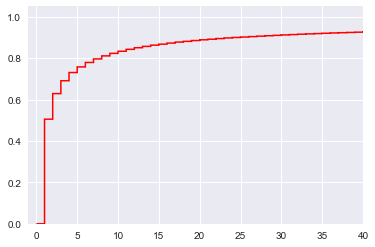

In [26]:
df = list((X > 0).sum(0).tolist()[0]) #I don't 100% understand what I'm doing here
c = pd.Series(df) #this is all the terms
b = np.arange(c.sum()) #this is their frequency
plt.hist(c,b, normed=1, histtype="step", color='r', cumulative=True, linewidth=1.5)
plt.xlim(-1,40)

In [27]:
from sklearn.model_selection import KFold
def cv_score(clf, X, y):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit the classifier, passed is as clf.
        result += clf.score(X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average


In [28]:
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(td.shape[0]), train_size=0.7)
mask = np.zeros(td.shape[0], dtype=np.bool)
mask[itest] = True

In [29]:
from sklearn.model_selection import cross_val_score
alphas = [.001,.01,.1, 1, 5, 10, 100]
best_min_df = [.001, .01,1,2,3,4,5] # YOUR TURN: put your value of min_df here.
scores_list=[]
#Find the best value for alpha and min_df, and the best classifier
results_list=[]
best_alpha = None
maxscore=-np.inf
for alpha in alphas:
    for df in best_min_df:
        vectorizer = CountVectorizer(min_df=df)
        Xthis, ythis = make_xy(td, vectorizer)
        Xtrainthis = Xthis[mask]
        ytrainthis = ythis[mask]
        clf=MultinomialNB(alpha=alpha)
        score=cv_score(clf,Xtrainthis, ytrainthis)
        scores_list.append((score,alpha, df))
for i in scores_list:
    if i[0] > maxscore:
        maxscore=i[0]
        results_list.append(i)
x=len(results_list)-1
best_alpha=results_list[x][1]
best_min_df=results_list[x][2]
results_list

[(0.67359735973597368, 0.001, 0.001),
 (0.68250825082508249, 0.001, 0.01),
 (0.68267326732673284, 0.1, 0.01),
 (0.69042904290429041, 1, 1),
 (0.69801980198019797, 5, 3),
 (0.69900990099009908, 5, 4),
 (0.69950495049504957, 5, 5)]

In [30]:
stoplist=["iota", "tau", "alpha", "kappa", "sigma", "rho", "eta", "upsilon", "omicron", "delta", "gmt", "bc", "anno", "domini", "ocs", "gamma", "pi"]
vectorizer = CountVectorizer(min_df=best_min_df, stop_words=stoplist)
X, y = make_xy(td, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.768152
Accuracy on test data:     0.693662


In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, clf.predict(xtest)))

[[4515 2216]
 [2115 5292]]


In [32]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:50]]
bad_words = words[ind[-50:]]

good_prob = probs[ind[:50]]
bad_prob = probs[ind[-50:]]

print("Good words\t     P(good | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad words\t     P(good | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(good | word)
                  mm 0.87
            prussian 0.87
              module 0.85
                 aid 0.85
            colonies 0.84
            resource 0.83
               glory 0.83
               crops 0.83
                tank 0.83
            narrator 0.82
            prestige 0.82
           commander 0.82
              caesar 0.82
         settlements 0.82
          blitzkrieg 0.82
                maps 0.81
         suitability 0.81
               catan 0.81
               reich 0.81
           supremacy 0.81
              worker 0.81
               focus 0.81
              russia 0.81
              swords 0.81
               wings 0.81
                  vp 0.80
              swedes 0.80
               shogi 0.80
                odin 0.80
            scenario 0.80
             austria 0.80
           regiments 0.80
         battlefield 0.80
              reason 0.80
            decisive 0.80
                axis 0.80
                frac 0.80
       